<a href="https://colab.research.google.com/github/DijanaLazic/PPPO_Projekat/blob/main/PPPO_Ultrasound_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predmet**: Principi prezentacije i prepoznavanje oblika

**Tema projektnog zadatka:  Ultrasound Nerve Segmentation**

**Student**: Dijana Lazić IT 19/2020

# **Uvod**
Primjena modernih tehnologija u medicini postala je dio svakodnevnice. Ovo je omogućilo velike prednosti za pacijent i ljekare. Pojava različitih medicinskih načina identifikacije i prikaza anatomskih regija čovjeka(MRI, CT, UV) omogućila je lakši uvid i brže dijagnostikovanje potencijalnih problema. Konkretno segmentacija nerava omogućila je identifikovanje nervnih struktura, što je omogućilo rano otkrivanje povreda, tumora i drugih nepravilnosti, ali i olakšano vršenje terapije. Međutim, čest problem koji se javlja u ovim procesima jeste prisustvo buke na slikama. Segmentacija poboljšava kvalitet i slika i na taj način olakšava potrebne medicinske terapije.


Cilj datog projektnog zadatka je da se istraže različiti načini segmentacije i da se jedan od njih primjeni praktično na odredjenom setu podataka. Set podataka sastoji se iz ultrazvučnih slika nerava, na osnovu kojih je potrebno izdvojiti regionalnosti od interesa, kako bi se mogle identifikovati nervne strukture i utvrditi da li postoji abnormalnost na određenoj slici, kao i njenu predikciju. Segmentacija predstavlja tehniku koja za cilj ima izdvajanje dijelova slike od interesa. Ona često utiče na dalje procese analize slike. U novom tehnološkom dobu, sve je veći porast interesovanja za tehnologije koje za cilj imaju automatizaciju obrade velikih količina multimedije. I dalje, veoma izazovan problem jeste izdvajanje semantičkog sadržaja iz slike. Upravo to dovodi do pitanja dekompozicije slike na segmete, što se i izvršava uz pomoć algoritama segmentacije. S obzirom na segmentaciju slike kao podelu slike na skup nepreklapajućih regiona čija unija je cijela slika, neka pravila koja treba slijediti za regione koje proističu iz segmentacije mogu se izraziti kao:

Potrebno je da budu uniformni i homogeni u pogledu neke karakteristike;
Njihova unutrašnjost treba da bude jednostavna i bez mnogo malih rupa;
Susedni regioni treba da imaju značajno različite vrednosti u pogledu uniformnih karakteristika;
Granice svakog segmenta treba da budu što jednostavnije, glatke, i moraju biti prostorno tačne.
Postoji nekoliko tehnika segmentacije, a dvije najpoznatije su:

Pronalaženje ivica - izdvajanje samo onih piksela koji pripadaju rubovima objekata
Izdvajanje regiona - izdvajanje cijelog objekta od pozadine pridružujući piksele čija je svetlost ispod nekog praga pozadini, a ostale objektu i obrnuto
Tako se mogu razlikovati i dvije kategorije algoritama: zasnovane na granici, koje eksplicitno detektuju konture objekta pomoću diskontinuiteta osobine i one na bazi regiona koje lociraju područja objekata eksplicitno prema osobini sličnosti.

Klasifikacija algoritama segmentacije je najčešće sljedeća: a. Segmentacija pragom (Thresholding) b. Segmentacija klasterizacijom (Clustering) c. Segmentacija regionom (Region) d. Segmentacija granicom regiona (Edge)

#**Metode dubokog učenja (Deep Learning)**

Semantička segmentacija slike je postala predmet interesa istraživača na području računarske vizije te se koristi u razumijevanju 2D slika i videa pa čak i višedimenzionalnih podataka. Različite metode dubokog učenja primjenjaju su prilikom ovih analiza i primjene različitih modela.
Neuronske mreže (Neural Networks – NN) predstavljaju novu generaciju sistema za informaciono procesiranje koje pokazuju osobinu učenja, memorisanja i generalizacije na osnovu podataka kojima se obučavaju.
Kada neuronska mreža sadrži više skrivenih slojeva smatra se dubokom neuronskom mrežom stoga se često u literaturi nađe pojam „duboke mreže“ ili „duboko učenje“. Konvolucijske neuronske mreže (engl. Convolutional Neural Networks, CNN) su najpoznatija, i najkorištenija arhitektura dubokog učenja inicijalno stvorena s ciljem obrade i analize slike.
Postoje različite vrste konvolucijskih neoronskih mreža, a neke od njih su:
2D CNN, 2.5 CNN, 3D CNN, Potpuno konvolucijske mreže (FCN), U-Net, V-Net, ResNet...
Za obradu i segmentaciju medicinskih slika najčešće se koriste U-Net, V-Net, ResNet, FCN, Attention U-Net. Odabir metode je izazovan zbog prirode podataka, zbog specifičnosti formata, modaliteta i dimenzionalnosti slika.
Za potrebe ovog projekta odabrana je metoda U-Net.
Ova metoda je naziv dobila po svom obliku (obliku slova U). Sastoji se iz dva glavna dijela: enkoder i dekoder. Enkoder jeste input layer koji izdvaja slike i daljim slojevima vrši njihovu pripremu i obradu, koja se kasnije povezuje sa konvolucionim slojevima dekodera, koji vrši na kraju genesrisanje maske, izoštravanje rezolucije..
**Bilblioteka** koja podržava UNet arhitekturu i koja će se koristiti u ovom radu jeste **PyTorch **


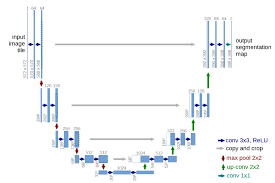**


# **Analiza podataka**

Kroz ovaj projekat, analiziraćemo dataset koji predstavlja skup slika sa ultrazvučnih pregleda. Zadatak jeste da se segmentira skup nerava.
Dataset se sastoji iz dva foldera: train i test i dva csv fajla.
 U **train** folderu nalaze se slike nad kojima će se obučavati model. Slike su u .tif formatu pod nazivom subject_imageNum.tif. Ppored slika tu su i maske za svaku sliku koje prikazuju prisustvo ili odsustvo identifikovanih nerava.
Isto tako i u **test** folderu, unutar kojeg se nalaze slike nad kojima ćemo testitrati model.
U **csv fajlovima** nalazi se broj piksela za svaku sliku.

In [2]:

!pip install --upgrade --no-cache-dir gdown


  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


Učitavanje seta podataka sa datog linka

In [3]:
!gdown --id 1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja -O data_images.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja
From (redirected): https://drive.google.com/uc?id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja&confirm=t&uuid=af8490e8-022c-48e4-9e4b-557ee5b402c2
To: /content/data_images.zip
100% 2.27G/2.27G [00:31<00:00, 72.1MB/s]


In [4]:
!unzip data_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_114_mask.tif   
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         

In [5]:
#Instalacija biblioteke PyTorch koja sadrži potrebne modele
! pip install segmentation-models-pytorch
!pip install git+https://github.com/qubvel/segmentation_models.pytorch



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 831.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [6]:
! pip install albumentations  #ovaj paket ce nam omoguciti kasniju augmentaciju podataka
! pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-1skrdb0a
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-1skrdb0a
  Resolved https://github.com/albu/albumentations to commit 8f3df5110a364163dfde1f2e808737868cea84cf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 134.3 MB/s eta 0:00:00
  Created wheel for albumentations: filename=albumentations-1.4.3-py3-none-any.whl size=137081 sha256=e2578ec24f43f4b338a3257b6548960566d32808366cb010a29f12ad5eb8b2e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-9xuhu2wy/wheels/3c/df/16/b3d0d64428c9f25b1ab03989a2e574546d3336647946d31e56
Successfully built albumentations
  Attempting uninstall: scikit-learn
    Found existing installation: sc

U narednom bloku izvršiće se importovanje potrebnih modula koji će se koristiti za dalju obuku i razvoj modela

In [7]:
import os
import csv
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import cv2
from tqdm.notebook import tqdm
from glob import glob
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split, KFold

import shutil

import torch
from torch.utils.data import DataLoader,Dataset
import torch.nn as nn
import albumentations
import torchvision
from torchvision import transforms, models

import random

import segmentation_models_pytorch as smp
from PIL import Image

Dalje je potrebno da definiše gdje se nalaze podaci i postave putanje

In [ ]:
#Putanje ka folderima koji sadrže trening i test podatke
trainpath = "train"
testpath = "test"

#Putanje ka maskama i originalnim slikama
masks = [os.path.join(trainpath,i) for i in os.listdir(trainpath) if "mask" in i]
imgs = [i.replace("_mask","") for i in masks]

Prikaz slika u dvodimenzionalnom formatu DataFrame-a.

In [9]:

data_df = pd.DataFrame({"image":imgs,"mask":masks})

#Podjela novoformatiranih podataka na validacione i testne(20% ukupnog seta):
train_df, validation_df = train_test_split(data_df,test_size = 0.20)

#Prikaz podataka
print(train_df.values.shape)
print(validation_df.values.shape)

(4789, 2)
(846, 2)


In [10]:

train_df.head()

,image,mask
1756,train/39_27.tif,train/39_27_mask.tif
5571,train/6_4.tif,train/6_4_mask.tif
3149,train/47_101.tif,train/47_101_mask.tif
298,train/17_39.tif,train/17_39_mask.tif
5597,train/31_43.tif,train/31_43_mask.tif


Prikaz prve četiri slike i njihove maske

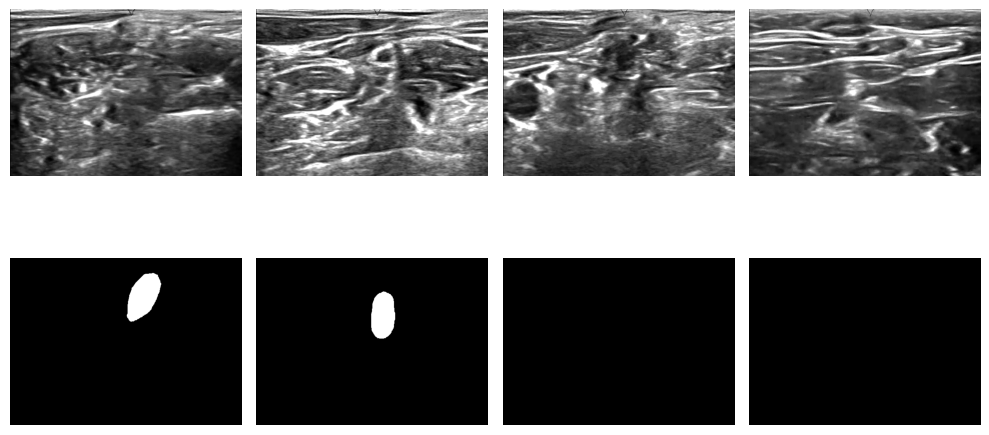

In [11]:
import numpy as np

# Broj redova i kolona za mrežu slika koje će biti prikazane
rows, cols = 2, 4

# Kreiranje nove slike (figure) sa određenom veličinom
fig = plt.figure(figsize=(10, 6))

# Dobavljanje prvih 3 putanje do slika i maski iz DataFrame-a
images_paths = data_df['image'].head(4)
masks_paths = data_df['mask'].head(4)

# Prikaz prvih 3 originalnih slika u prvom redu
for i, img_path in enumerate(images_paths, 1):
    # Dodavanje subplot-a na mrežu, određen rednim brojem iteracije
    ax = fig.add_subplot(rows, cols, i)
    # Prikazivanje originalne slike
    ax.imshow(np.array(Image.open(img_path)), cmap='gray')
    ax.axis('off')  # Isključivanje oznaka osa

# Dobavljanje prvih 3 maski iz DataFrame-a
for i, msk_path in enumerate(masks_paths, 1):
    # Dodavanje subplot-a na mrežu, određen rednim brojem iteracije
    ax = fig.add_subplot(rows, cols, i + 4)  # Dodajemo 3 jer smo već koristili prvih 3 subplot-a
    # Prikazivanje maske kao zasebne slike
    ax.imshow(np.array(Image.open(msk_path)), cmap='gray')  # Ovde možete promeniti cmap i alpha prema vašim potrebama
    ax.axis('off')  # Isključivanje oznaka osa

plt.tight_layout()  # Automatsko podešavanje razmaka između slika
plt.show()


#**Predprocesiranje**
Prije nego što krenemo sa modelom potrebno je pripremiti podatke za njihovu obradu. Često se set podataka mora dodatno urediti, možda proširiti ili poboljšati. Neke od metoda koje se koriste u ovoj fazi su translacija, rotacija ili poboljšanje slika upotrebom različitih filtera i funkcija.


In [12]:

def convert_to_tensor(x,**kwargs):
    return x.transpose(2,0,1).astype("float32")

#Generisanje kompozicije transformacija koristeći biblioteku Albumentations za obradu slika
def preprocessing(preprocessing_fn=None):
    transform = []
    if preprocessing_fn:
        transform.append(albumentations.Lambda(image=preprocessing_fn))
    transform.append(albumentations.Lambda(image=convert_to_tensor))
    return albumentations.Compose(transform)

#Funkcija koja izvršava augmentaciju mijenjanjem osvjetljenja, rotacijom, skaliranjem
def train_aug():
    transform =  [
                albumentations.Resize(height=224,width=224,interpolation=Image.BILINEAR),
                albumentations.RandomBrightnessContrast(brightness_limit=0.10, contrast_limit=0),
                albumentations.ShiftScaleRotate(rotate_limit=15, shift_limit=0.20, scale_limit=0.2),
                albumentations.HorizontalFlip(),
            ]
    return albumentations.Compose(transform)

def validation_aug():
    transform = [
                albumentations.Resize(height=224,width=224,interpolation=Image.BILINEAR),
            ]
    return albumentations.Compose(transform)



In [13]:
#Prilagođeni dataset koji se koristi za učenje modela
class GetDataset(Dataset):
    def __init__(self,imagespath,maskspath,augment=None,preprocess=None):
        self.imagespath = imagespath
        self.maskspath = maskspath
        self.augment = augment
        self.preprocess = preprocess


    def __len__(self):
        return len(self.imagespath)


  #izvlačenje pojedinačnih primjera
    def __getitem__(self,idx):

        image = cv2.cvtColor(cv2.imread(self.imagespath[idx]),cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.maskspath[idx], cv2.IMREAD_GRAYSCALE)

        if self.augment:
            sample = self.augment(image=image, mask=mask)
            image,mask = sample['image'],sample['mask']
        if self.preprocess:
            sample = self.preprocess(image=image,mask=mask)
            image,mask = sample['image'],sample['mask']

        #normalizacija maske
        mask = (mask / 255).astype(np.float32)

        #prilagođavanje očekivanom formatu ulaza u model
        mask = np.expand_dims(mask, axis=0)

        return image,mask

#**Model**
Kada su podaci pripremljeni, vrši se postavljanje modela. Kako su modeli već unaprijed istrenirani upotrebljavaju se parametri određeni za svaku porodicu encoder-a. Lista parametara za encoder preuzeta je sa sljedećeg linka: https://github.com/qubvel/segmentation_models.pytorch


In [14]:
encoder = "resnet34"
encoder_wts = "imagenet"
activation = "sigmoid"

#Inicijalizacija modela za prethodno datim parametrima
model = smp.Unet(encoder_name=encoder,
                 activation=activation,
                 encoder_weights=encoder_wts)

preprocess_fn = smp.encoders.get_preprocessing_fn(encoder,encoder_wts)



Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 197MB/s]


Da bismo mogli iskoristiti funkcije za augemntaciju i predprocesiranje, potrebno je da modelu proslijedimo prave podatke.

In [15]:
train_data_model = GetDataset(imagespath = train_df['image'].tolist(),
                            maskspath = train_df['mask'].tolist(),
                            augment = train_aug(),
                            preprocess = preprocessing(preprocess_fn))

val_data_model = GetDataset(imagespath = validation_df['image'].tolist(),
                            maskspath = validation_df['mask'].tolist(),
                            augment = validation_aug(),
                            preprocess = preprocessing(preprocess_fn))



batch_size = 20
train_data_load = DataLoader(train_data_model,
                         batch_size = batch_size,
                         shuffle=True)
val_data_load = DataLoader(val_data_model,
                       batch_size=batch_size,
                       shuffle=False)

#**Treniranje**

Prije nego što se krene sa treniranjem modela, potrebno je postaviti parametre koji određuju način treniranja i one po kojima ćemo posmatrati model. U samom procesu treniranja, model će se obučavati sa postavljenim parametrima kroz 7 epoha.

In [16]:
from segmentation_models_pytorch import utils
trainmodel = True
epochs = 7
device = "cpu"

#Postavljanje parametara za praćenje performansi modela
loss = smp.utils.losses.DiceLoss()
metrics = [ smp.utils.metrics.IoU(threshold=0.5) ]
optimizer = torch.optim.Adam([dict(params=model.parameters(), lr=0.001)])
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, epochs)





In [17]:
training_epoch = smp.utils.train.TrainEpoch(model,
                                        loss=loss,
                                        optimizer=optimizer,
                                        metrics=metrics,
                                        device=device,
                                        verbose=True)
validation_epoch = smp.utils.train.ValidEpoch(model,
                                        loss=loss,
                                        metrics=metrics,
                                        device=device,
                                        verbose=True)

best_iou_score = 0.0 #najbolji rezultat IoU metrike na validacijskom skupu

train_logs_list, valid_logs_list = [], []
for i in range(0,epochs):
    print('\nEpoch: {}'.format(i))
    trainlogs = training_epoch.run(train_data_load)
    validlogs = validation_epoch.run(val_data_load)
    scheduler.step()

    train_logs_list.append(trainlogs)
    valid_logs_list.append(validlogs)

    checkpoint_path = './model_checkpoint_epoch{}.pth'.format(i)
    torch.save({
        'epoch': i,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_iou_score': best_iou_score,
        'train_logs_list': train_logs_list,
        'valid_logs_list': valid_logs_list
    }, checkpoint_path)

    if best_iou_score < validlogs['iou_score']:
        best_iou_score = validlogs['iou_score']
        torch.save(model, './best_model.pth')


Epoch: 0
valid: 100%|██████████| 43/43 [04:19<00:00,  6.02s/it, dice_loss - 0.5513, iou_score - 0.2982]

Epoch: 1
valid: 100%|██████████| 43/43 [04:09<00:00,  5.79s/it, dice_loss - 0.4429, iou_score - 0.392]

Epoch: 2
valid: 100%|██████████| 43/43 [04:09<00:00,  5.81s/it, dice_loss - 0.4223, iou_score - 0.4139]

Epoch: 3
valid: 100%|██████████| 43/43 [04:11<00:00,  5.84s/it, dice_loss - 0.421, iou_score - 0.4158]

Epoch: 4
valid: 100%|██████████| 43/43 [04:05<00:00,  5.71s/it, dice_loss - 0.4023, iou_score - 0.4354]

Epoch: 5
valid: 100%|██████████| 43/43 [04:15<00:00,  5.95s/it, dice_loss - 0.3957, iou_score - 0.4428]

Epoch: 6
valid: 100%|██████████| 43/43 [04:11<00:00,  5.86s/it, dice_loss - 0.3892, iou_score - 0.4494]


#**Evaluacija**

Dalje slijedi, grafički prikaz treniranje modela. Prikazani grafikoni se često koriste za praćenje performansi modela tokom treniranja i validacije.

Prvi grafikon će prikazati promjene u vrijednostima IoU ocjena (Intersection over Union) tokom vremena za trening i validacijske podatke kroz epohe. IoU je mjera tačnosti segmentacije koja mjeri preklapanje između predviđenih i stvarnih regija interesa na slici.

Drugi grafikon će prikazati promjene u vrijednostima Dice Lossa tokom vremena za trening i validacijske podatke kroz epohe. Dice Loss je funkcija gubitka koja se koristi u zadacima segmentacije kako bi se mjerila razlika između stvarnih i predviđenih regija interesa na slici. Oba ova parametra smo uključili u praćenje prije samog procesa treniranja.


In [18]:
#Prikaz vrijednosti kroz epohe
train_logs_df = pd.DataFrame(train_logs_list)
valid_logs_df = pd.DataFrame(valid_logs_list)
train_logs_df.T

,0,1,2,3,4,5,6
dice_loss,0.616842,0.464999,0.447158,0.424767,0.406531,0.394461,0.377982
iou_score,0.269094,0.373346,0.389426,0.410984,0.428507,0.441439,0.458808


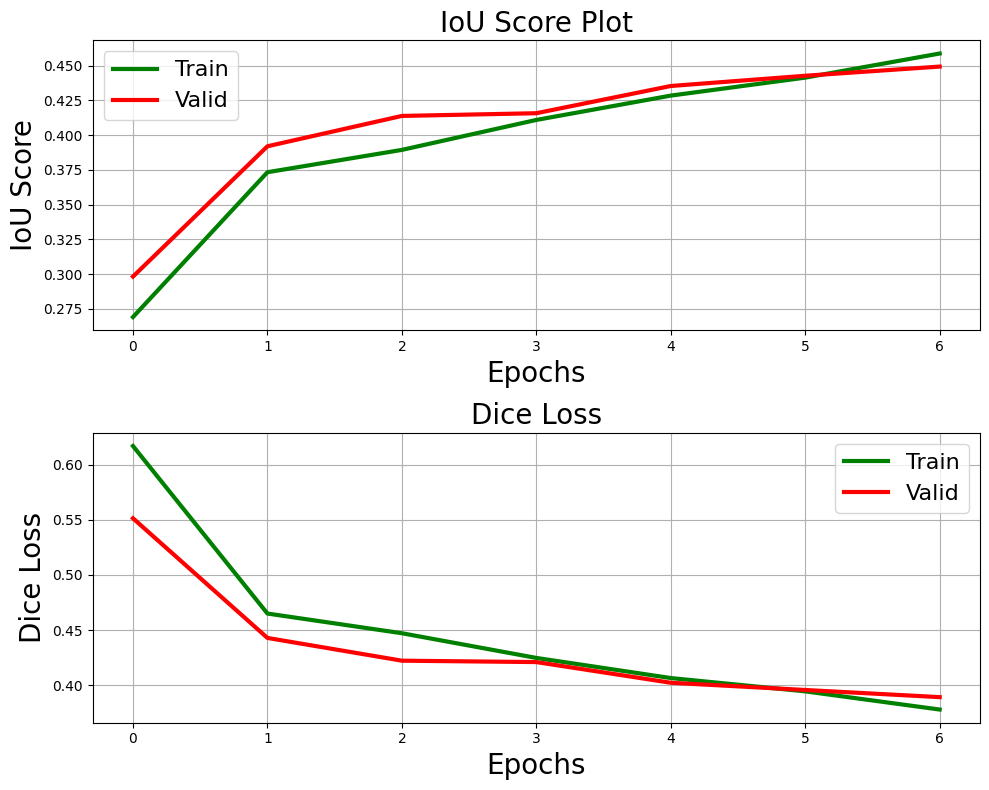

In [19]:
import matplotlib.pyplot as plt

# Kreiranje prve slike s dva grafikona
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Prvi grafikon - IoU Score
axs[0].plot(train_logs_df.index.tolist(), train_logs_df.iou_score.tolist(), 'g-', lw=3, label='Train')
axs[0].plot(valid_logs_df.index.tolist(), valid_logs_df.iou_score.tolist(), 'r-', lw=3, label='Valid')
axs[0].set_xlabel('Epochs', fontsize=20)
axs[0].set_ylabel('IoU Score', fontsize=20)
axs[0].set_title('IoU Score Plot', fontsize=20)
axs[0].legend(loc='best', fontsize=16)
axs[0].grid()

# Drugi grafikon - Dice Loss
axs[1].plot(train_logs_df.index.tolist(), train_logs_df.dice_loss.tolist(), 'g-', lw=3, label='Train')
axs[1].plot(valid_logs_df.index.tolist(), valid_logs_df.dice_loss.tolist(), 'r-', lw=3, label='Valid')
axs[1].set_xlabel('Epochs', fontsize=20)
axs[1].set_ylabel('Dice Loss', fontsize=20)
axs[1].set_title('Dice Loss', fontsize=20)
axs[1].legend(loc='best', fontsize=16)
axs[1].grid()

plt.tight_layout()  # Ovo će automatski prilagoditi raspored grafikona kako bi se izbjeglo preklapanje
plt.show()


# **Testiranje**
Na kraju, testira se model tako što se prikazuje par slika na kojima se vidi originalna slika i maska, i predviđena maska. Nakon toga kreira se submission csv gajl koji sadrži predikciju za svaku sliku tj. gdje se po predikciji nalazi nerv.

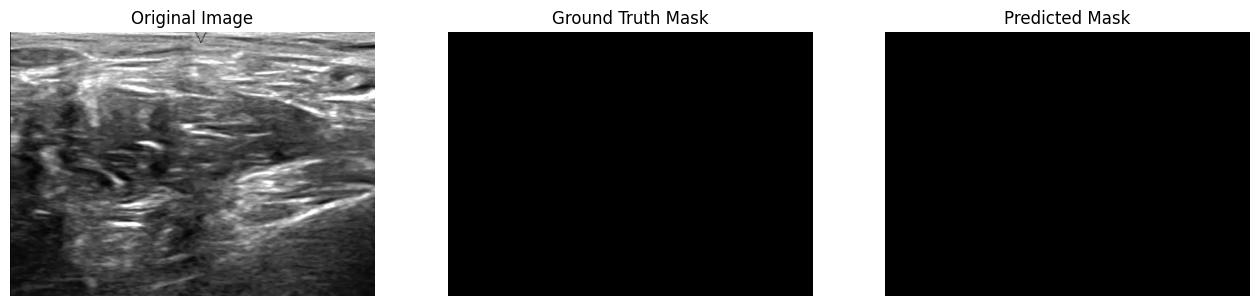

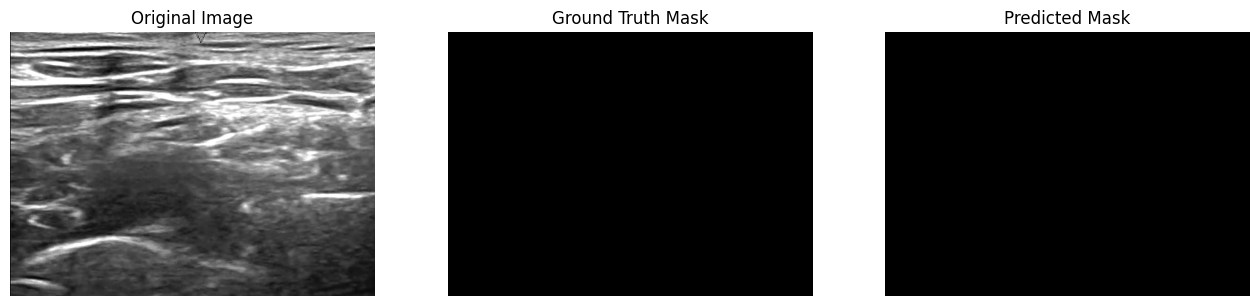

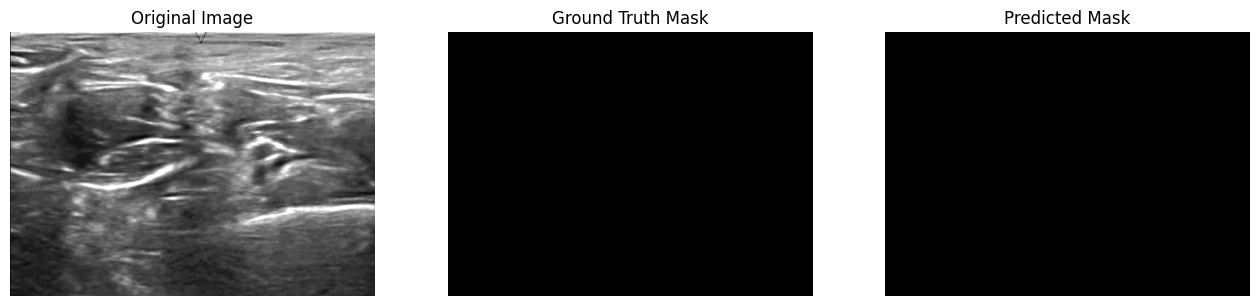

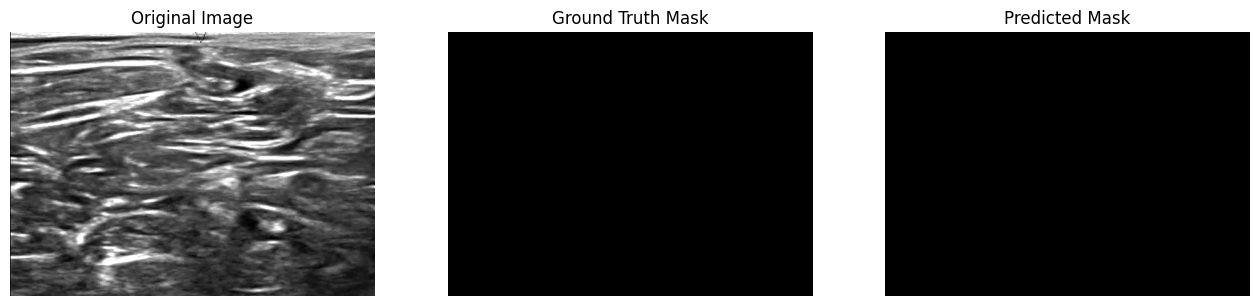

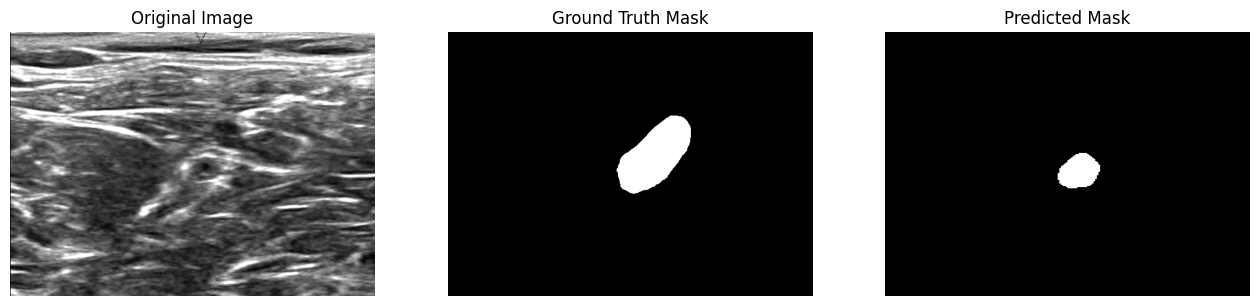

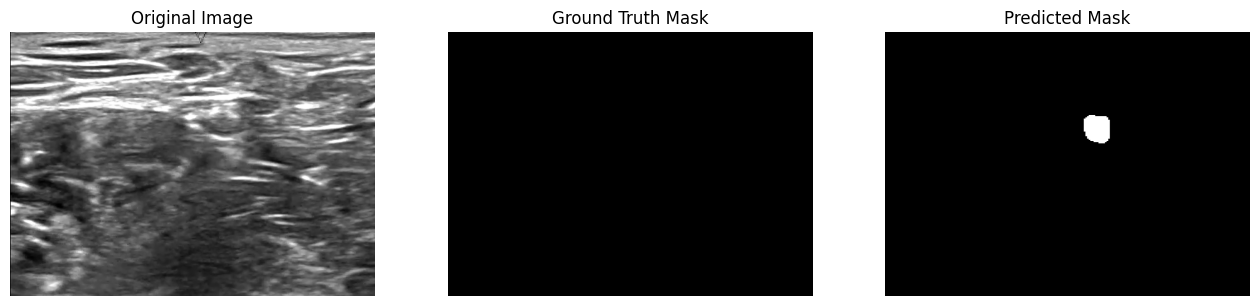

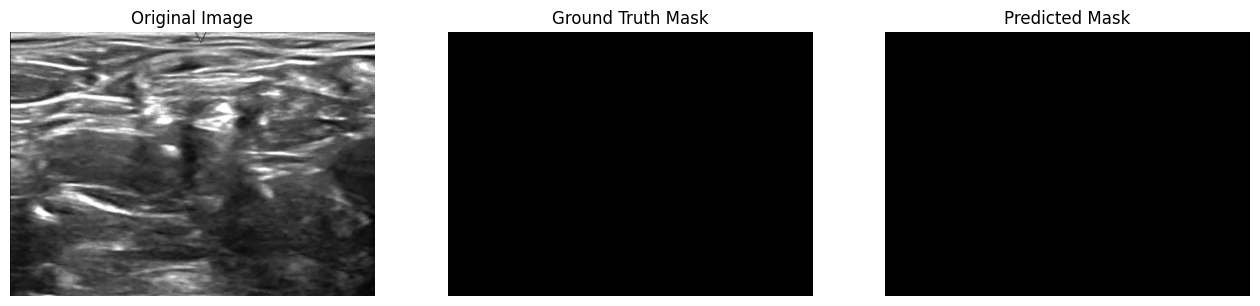

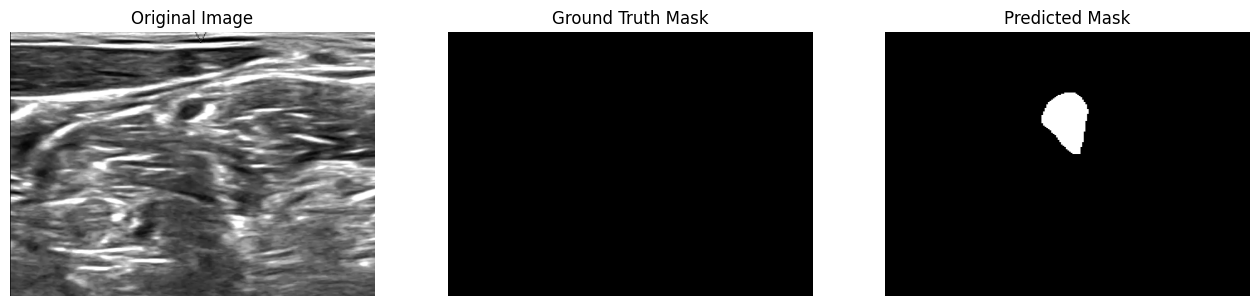

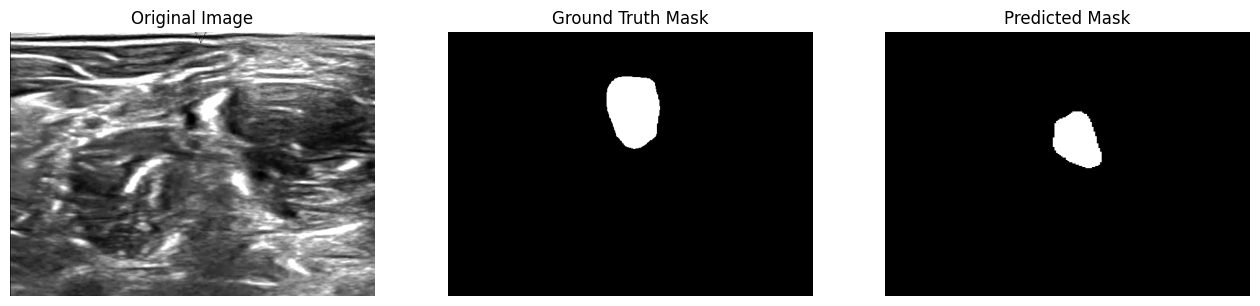

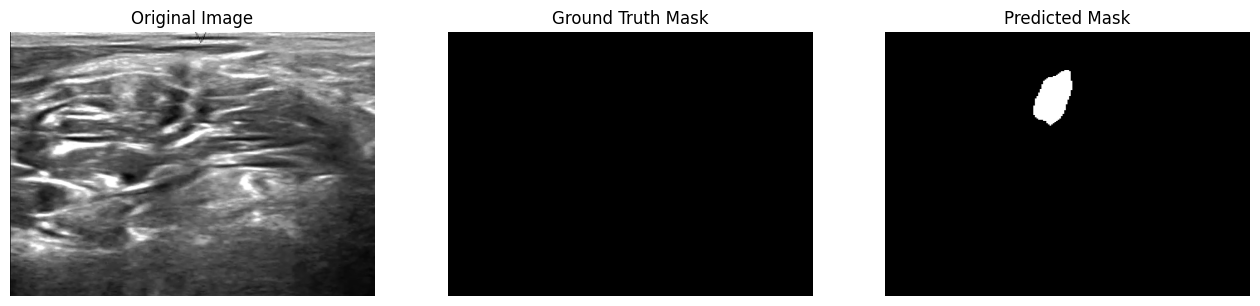

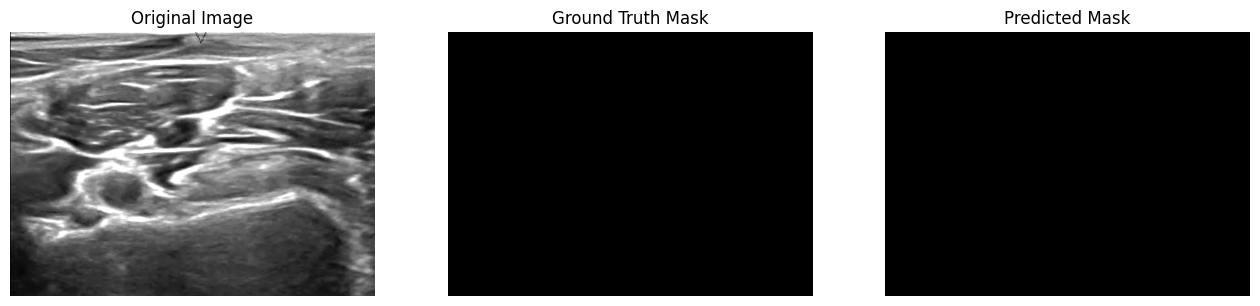

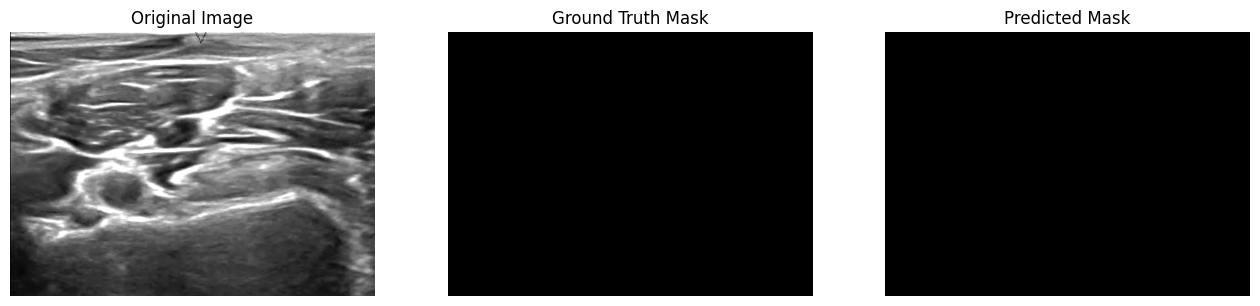

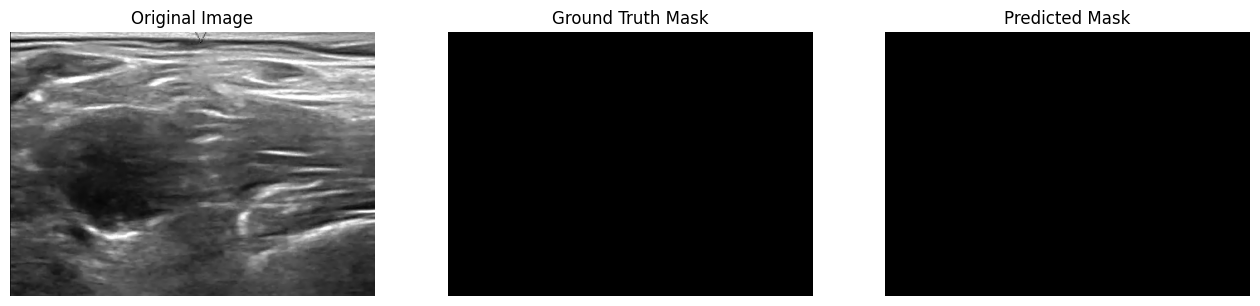

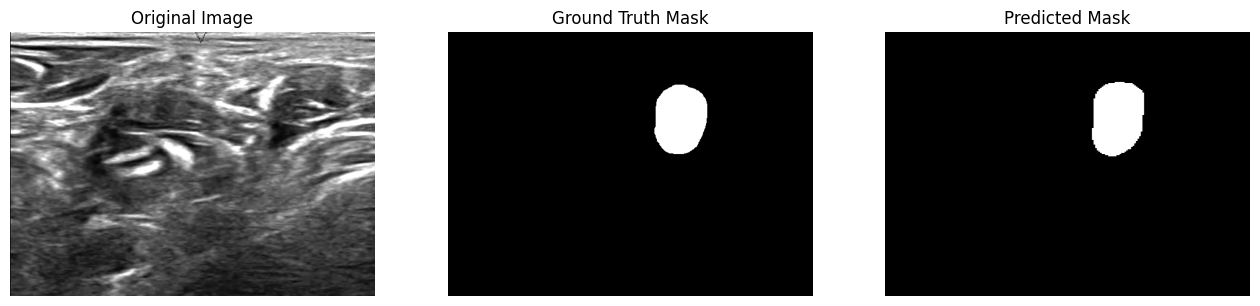

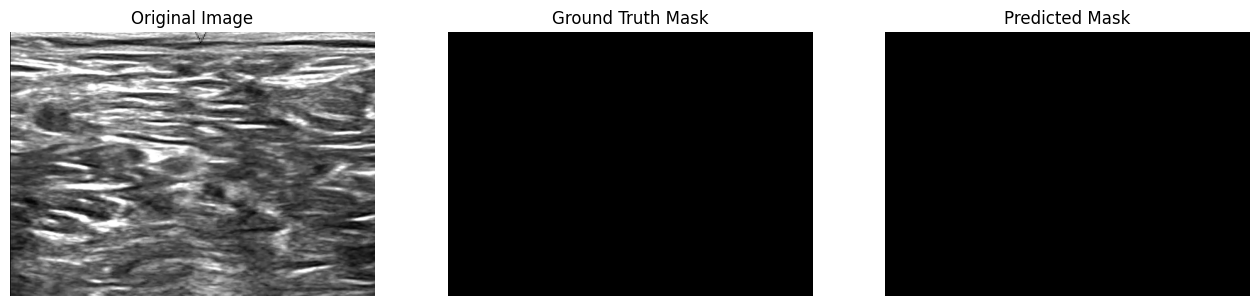

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

m_segmentation_model = torch.load('./best_model.pth')

#Učitavanje podataka da bi se mogli koristiti u funkciji za prikaz
test_dset = GetDataset(imagespath = validation_df['image'].tolist(),
                            maskspath = validation_df['mask'].tolist(),
                            augment = validation_aug(),
                           preprocess = preprocessing(preprocess_fn))


test_dset_vis = GetDataset(imagespath = validation_df['image'].tolist(),
                            maskspath = validation_df['mask'].tolist())




 # Definisanje funkcije za prikaz slika
def visualize_images(image, ground_truth_mask, predicted_mask):
    plt.figure(figsize=(16, 5))

    # Prikaz originalne slike
    plt.subplot(1, 3, 1)
    plt.imshow(image.astype('uint8'))
    plt.title('Original Image')
    plt.axis('off')

    # Prikaz stvarne maske
    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth_mask.astype('uint8'), cmap='gray', extent=(0, ground_truth_mask.shape[1], ground_truth_mask.shape[0], 0))
    plt.title('Ground Truth Mask')
    plt.axis('off')

    # Prikaz predviđene maske
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask, cmap='gray', extent=(0, ground_truth_mask.shape[1], ground_truth_mask.shape[0], 0))
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.show()

# Testiranje modela na 15 slika
for i in range(15):
    n = np.random.choice(len(test_dset))

    image_vis = test_dset_vis[n][0].astype('uint8')
    mask_vis = test_dset_vis[n][1].astype('uint8')
    image, gt_mask = test_dset[n]

    gt_mask = gt_mask.squeeze()

    x_tensor = torch.from_numpy(image).to(device).unsqueeze(0)
    pr_mask = m_segmentation_model.predict(x_tensor)
    pr_mask = pr_mask.squeeze().cpu().numpy().round()

    mask_vis = mask_vis.squeeze()

    visualize_images(image_vis, mask_vis, pr_mask)



In [ ]:
import os
#Run-Length Encoding- kodiranje binarnog niza
def rle_encoding(x):
    #flatten() ili poravnanje- pretvranje u jednodimenzioni niz
    dots = np.where(x.T.flatten()==1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

imgs = [f for f in os.listdir(testpath)]
imgs = sorted(imgs, key=lambda s: int(s.split('.')[0]))

encodings = []

for m in tqdm(imgs):
    x = cv2.imread(os.path.join(testpath, m))

    x = validation_aug()(image=x)['image']
    x = preprocessing(preprocess_fn)(image=x)['image']

    x_tensor = torch.from_numpy(x).to(device).unsqueeze(0)
    pr_mask = m_segmentation_model.predict(x_tensor)

    pr_mask = pr_mask.squeeze().cpu().numpy().round().astype(np.uint8)
    pr_mask = albumentations.Resize(height=420,width=580,interpolation=Image.NEAREST)(image=pr_mask)['image']

    encodings.append(rle_encoding(pr_mask))

In [ ]:

df_submission = pd.DataFrame(columns=["img", "pixels"])
for i, encoding in enumerate(encodings):
    pixels = ' '.join(map(str, encoding))
    df_submission.loc[i] = [str(i+1), pixels]

df_submission.to_csv('submission.csv', index=False)

# **Zaključak**

Uspješno je kreiran i istestiran model. Iz rezultata koje vidimo, možemo zaključiti da prostora za poboljšanje ima još mnogo. Razloga je više, ali prenstveno podešavanje parametara je prilagođeno rapoloživim resursima hardvera. Npr. broj epoha je mogao biti veći, i tada bi model bio bolje istreniran, ali je on smanjen zbog ograničenih mogućnosti resursa.
S obzirom na ciljeve i zahtjeve zadatka, možemo zaključiti da su ti uslovi zadovoljeni, a svakako da bi dodatni razvoj poboljšao model u još većoj mjeri.

# **Reference**



*   POSTOJEĆE TEHNIKE ZA SEGMENTACIJU SLIKE - Dragan Lazarević, Dr Milan Mišić, Dr Bogdan Ćirković: https://www.cqm.rs/2014/cd2/pdf/papers/focus_1/10.pdf

*   SEGMENTACIJA SLIKE: https://dsp.etfbl.net/dip/predavanja/5asegmentacija.pdf

*   SEMANTIČKA SEGMENTACIJA MEDICINSKIH SLIKA METODAMA DUBOKOG UČENJA, Ana Pinjuh:
https://data.fesb.unist.hr/documents/public/news/5.%20A.Pinjuh-kvalifikacijski%20rad.pdf


*   Training UNet: https://debuggercafe.com/training-unet-from-scratch


*   GitHub:  https://github.com/qubvel/segmentation_models.pytorch?tab=readme-ov-file




